# Decision Tree Classifier Building in Scikit-learn 

## Importing Required Libraries
Let's first load the required libraries.

In [30]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [31]:
# load dataset
pima = pd.read_csv("./data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.columns = col_names  

In [33]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [34]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
y_train_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


## Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

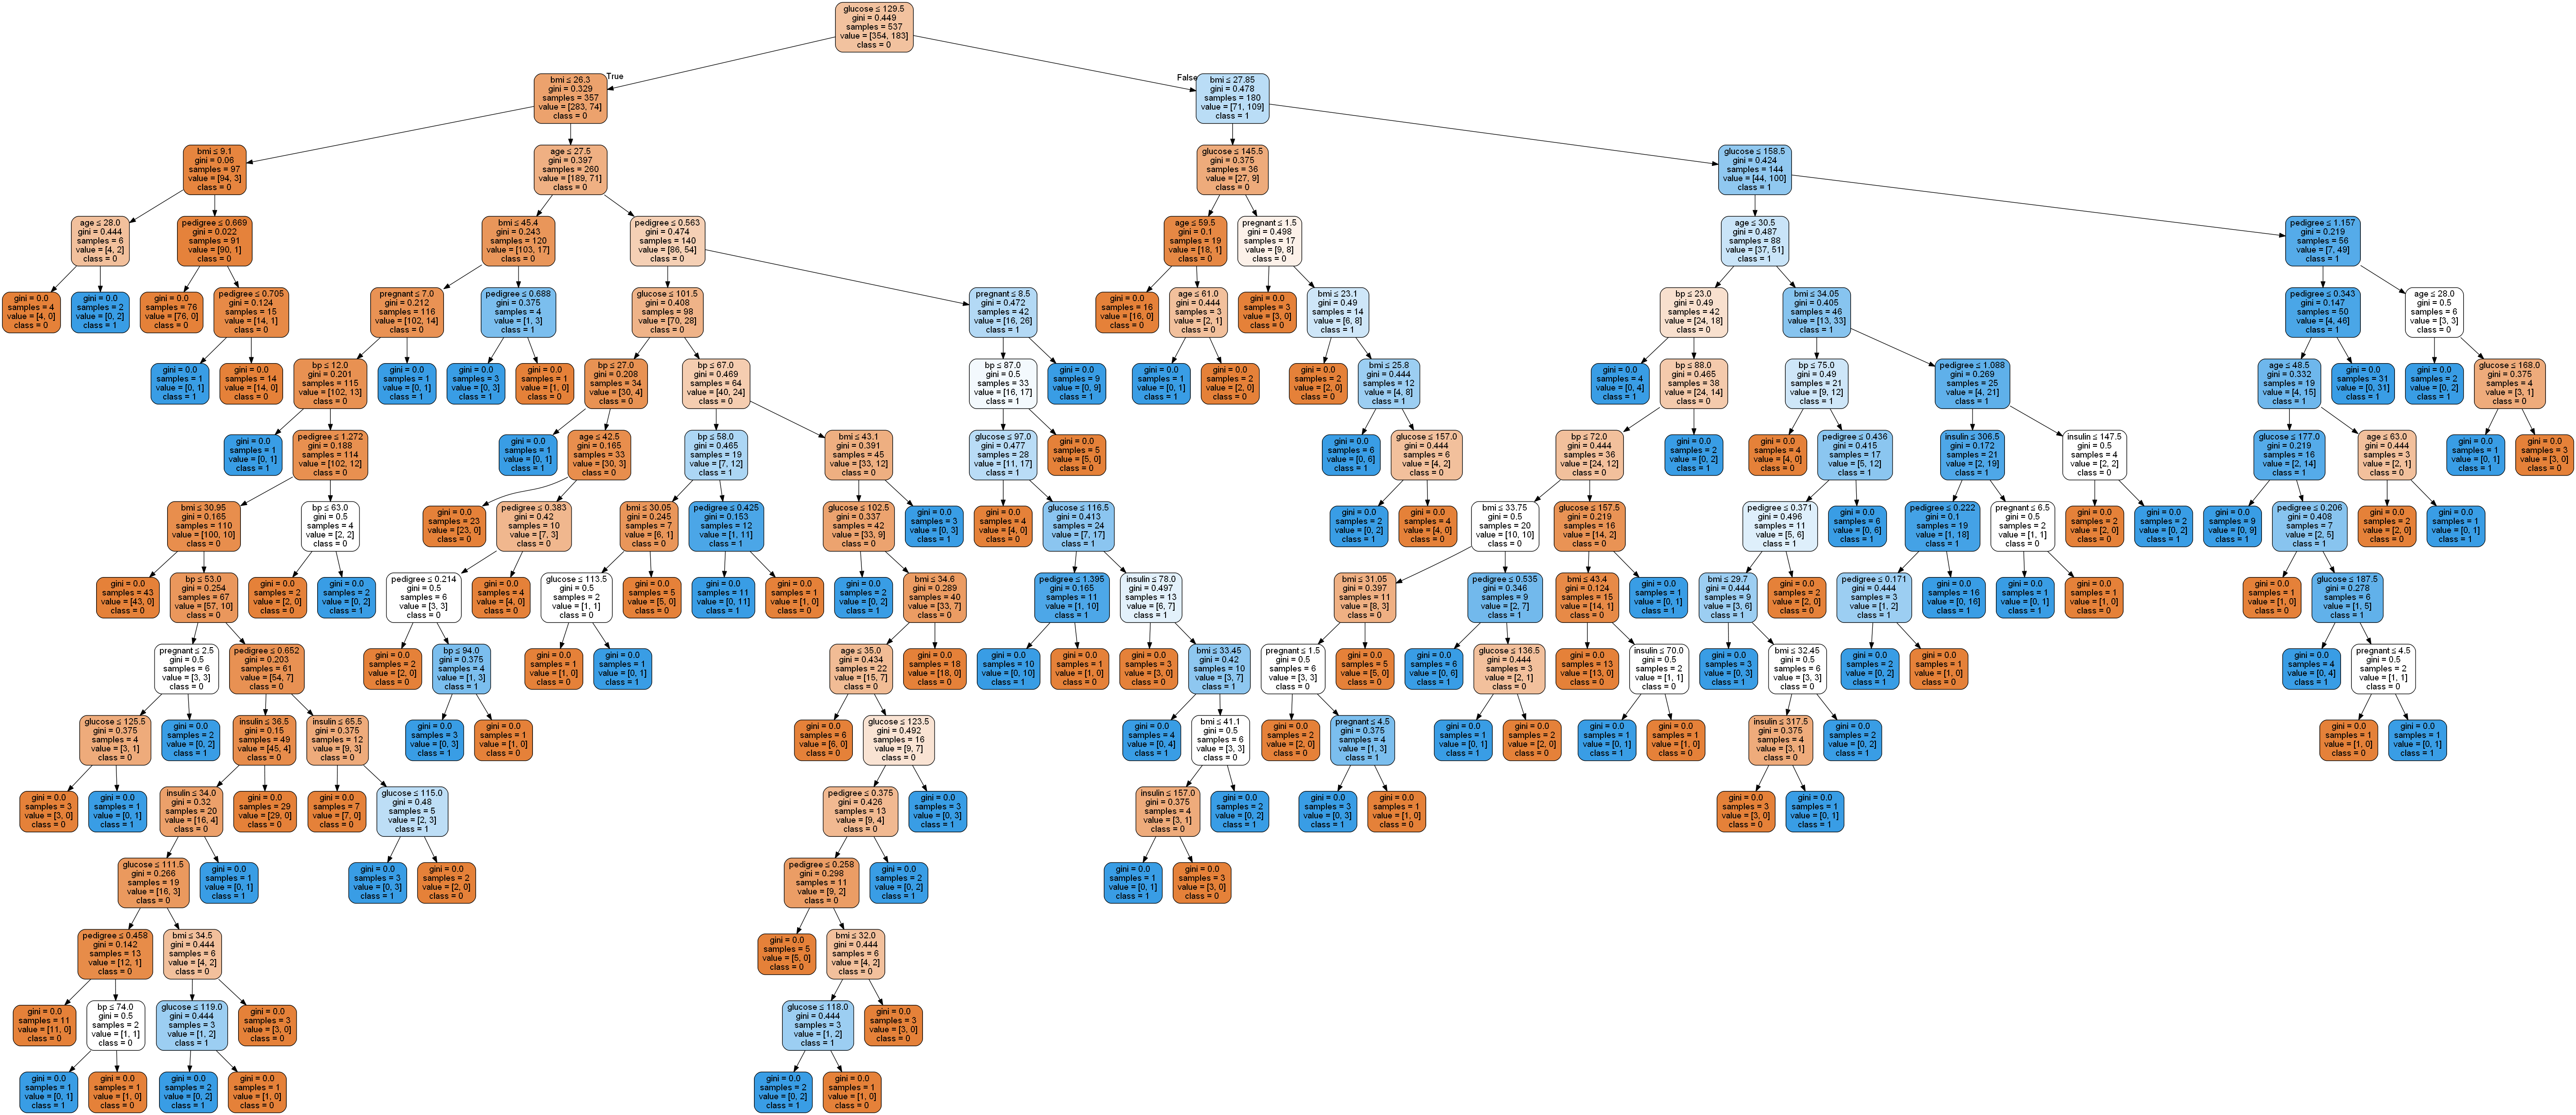

In [38]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from io import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [46]:
y_train_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.7635009310986964


## Visualizing Decision Trees

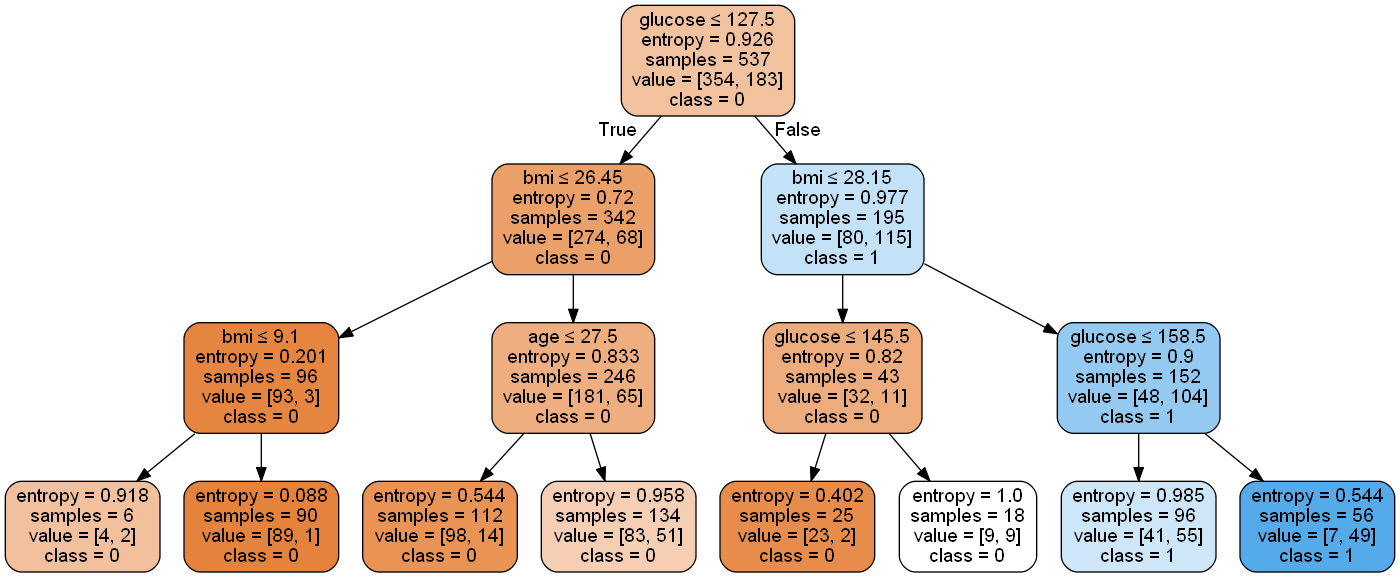

In [40]:
# from sklearn.externals.six import StringIO  
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_depth_3.png')
Image(graph.create_png())